In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Define the heads, relations, and tails for the social network dataset
head_social = ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Alice', 'Bob', 'Bob', 'David', 'Eve', 'Alice', 'Bob',
               'Charlie', 'David', 'Eve', 'Frank', 'Alice', 'Bob', 'Bob', 'David', 'Eve', 'Alice', 'Bob', 'Charlie',
               'David', 'Eve', 'Frank', 'Alice', 'Bob', 'Bob', 'David', 'Eve', 'Alice', 'Bob', 'Charlie', 'David', 'Eve']
relation_social = ['like', 'like', 'has', 'like', 'has', 'like', 'has', 'like', 'has', 'knows', 'enjoys', 'enjoys', 'has',
                   'like', 'has', 'enjoys', 'has', 'enjoys', 'like', 'enjoys', 'like', 'has', 'like', 'enjoys', 'like', 'has',
                   'enjoys', 'has', 'like', 'enjoys', 'has', 'like', 'enjoys', 'has', 'like', 'enjoys', 'has', 'like']
tail_social = ['book', 'guitar', 'cat', 'movie', 'dog', 'phone', 'computer', 'painting', 'car', 'Jack', 'music', 'painting', 'phone',
               'movie', 'guitar', 'book', 'cat', 'book', 'movie', 'book', 'guitar', 'car', 'music', 'book', 'music', 'painting',
               'movie', 'computer', 'guitar', 'painting', 'phone', 'guitar', 'movie', 'computer', 'cat', 'movie', 'phone', 'music']
# Create a dataframe for the social network dataset
df = pd.DataFrame({'head': head_social, 'relation': relation_social, 'tail': tail_social})


In [ ]:
print(df.head())

      head relation    tail
0    Alice     like    book
1      Bob     like  guitar
2  Charlie      has     cat
3    David     like   movie
4      Eve      has     dog


In [ ]:
df.shape

(38, 3)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a knowledge graph
G = nx.Graph()
for _, row in df.iterrows():
 G.add_edge(row['head'], row['tail'], label=row['relation'])

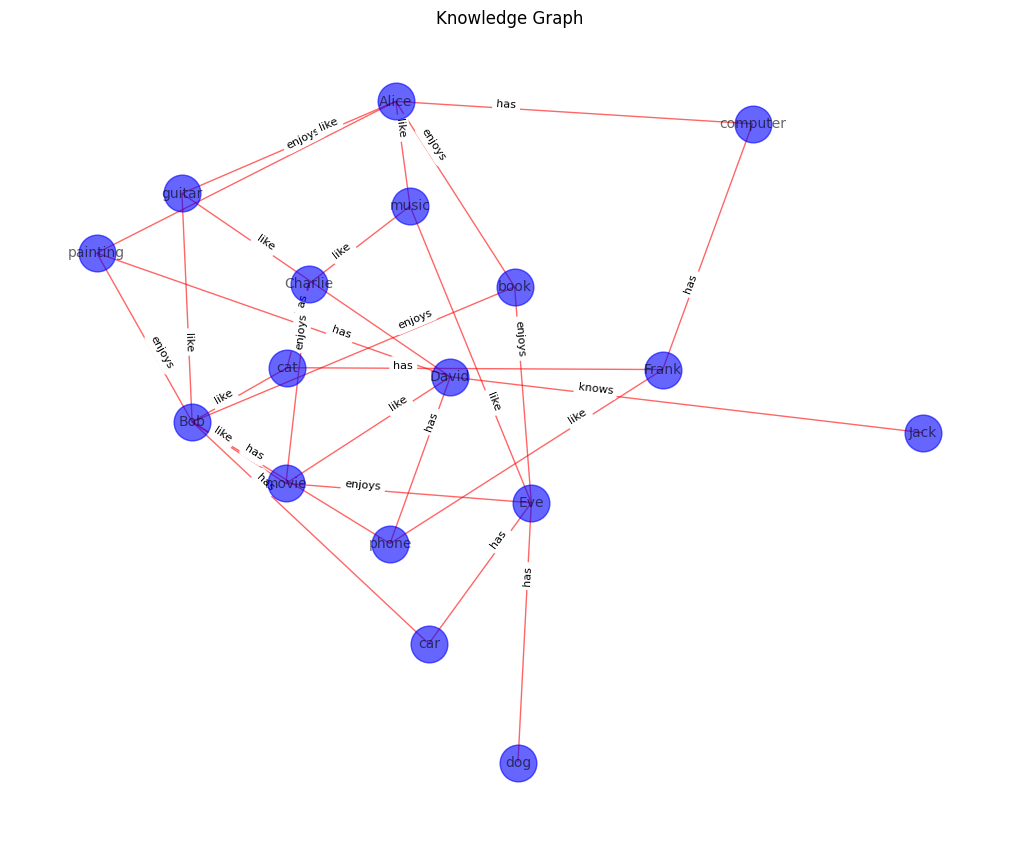

In [ ]:
# Visualize the knowledge graph
pos = nx.spring_layout(G, seed=42, k=0.9)
labels = nx.get_edge_attributes(G, 'label')
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, font_size=10, node_size=700, node_color='blue', edge_color='red', alpha=0.6)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8, label_pos=0.3, verticalalignment='baseline')
plt.title('Knowledge Graph')
plt.show()

In [ ]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f'Number of nodes: {num_nodes}')
print(f'Number of edges: {num_edges}')
print(f'Ratio edges to nodes: {round(num_edges / num_nodes, 2)}')

Number of nodes: 17
Number of edges: 28
Ratio edges to nodes: 1.65


In [ ]:
degree_centrality = nx.degree_centrality(G)
for node, centrality in degree_centrality.items():
 print(f'{node}: Degree Centrality = {centrality:.2f}')

Alice: Degree Centrality = 0.31
book: Degree Centrality = 0.19
Bob: Degree Centrality = 0.44
guitar: Degree Centrality = 0.19
Charlie: Degree Centrality = 0.19
cat: Degree Centrality = 0.19
David: Degree Centrality = 0.31
movie: Degree Centrality = 0.25
Eve: Degree Centrality = 0.31
dog: Degree Centrality = 0.06
Frank: Degree Centrality = 0.19
phone: Degree Centrality = 0.19
computer: Degree Centrality = 0.12
painting: Degree Centrality = 0.19
car: Degree Centrality = 0.12
Jack: Degree Centrality = 0.06
music: Degree Centrality = 0.19


In [ ]:
betweenness_centrality = nx.betweenness_centrality(G)
for node, centrality in betweenness_centrality.items():
 print(f'Betweenness Centrality of {node}: {centrality:.2f}')

Betweenness Centrality of Alice: 0.16
Betweenness Centrality of book: 0.07
Betweenness Centrality of Bob: 0.28
Betweenness Centrality of guitar: 0.05
Betweenness Centrality of Charlie: 0.05
Betweenness Centrality of cat: 0.07
Betweenness Centrality of David: 0.18
Betweenness Centrality of movie: 0.15
Betweenness Centrality of Eve: 0.19
Betweenness Centrality of dog: 0.00
Betweenness Centrality of Frank: 0.05
Betweenness Centrality of phone: 0.07
Betweenness Centrality of computer: 0.03
Betweenness Centrality of painting: 0.05
Betweenness Centrality of car: 0.02
Betweenness Centrality of Jack: 0.00
Betweenness Centrality of music: 0.07


In [ ]:
closeness_centrality = nx.closeness_centrality(G)
for node, centrality in closeness_centrality.items():
 print(f'Closeness Centrality of {node}: {centrality:.2f}')

Closeness Centrality of Alice: 0.48
Closeness Centrality of book: 0.47
Closeness Centrality of Bob: 0.55
Closeness Centrality of guitar: 0.47
Closeness Centrality of Charlie: 0.43
Closeness Centrality of cat: 0.44
Closeness Centrality of David: 0.48
Closeness Centrality of movie: 0.50
Closeness Centrality of Eve: 0.46
Closeness Centrality of dog: 0.32
Closeness Centrality of Frank: 0.39
Closeness Centrality of phone: 0.44
Closeness Centrality of computer: 0.38
Closeness Centrality of painting: 0.47
Closeness Centrality of car: 0.42
Closeness Centrality of Jack: 0.33
Closeness Centrality of music: 0.44


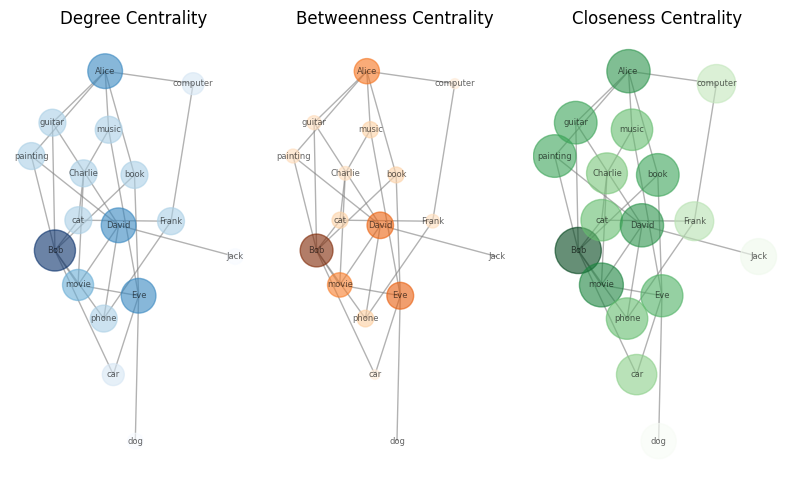

In [ ]:
# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Visualize centrality measures
plt.figure(figsize=(8,5))

# Degree centrality
plt.subplot(131)
nx.draw(G, pos, with_labels=True, font_size=6, node_size=[v * 2000 for v in degree_centrality.values()], node_color=list(degree_centrality.values()), cmap=plt.cm.Blues, edge_color='gray', alpha=0.6)
plt.title('Degree Centrality')

# Betweenness centrality
plt.subplot(132)
nx.draw(G, pos, with_labels=True, font_size=6, node_size=[v * 2000 for v in betweenness_centrality.values()], node_color=list(betweenness_centrality.values()), cmap=plt.cm.Oranges, edge_color='gray', alpha=0.6)
plt.title('Betweenness Centrality')

# Closeness centrality
plt.subplot(133)
nx.draw(G, pos, with_labels=True, font_size=6, node_size=[v * 2000 for v in closeness_centrality.values()], node_color=list(closeness_centrality.values()), cmap=plt.cm.Greens, edge_color='gray', alpha=0.6)
plt.title('Closeness Centrality')

plt.tight_layout()
plt.show()